In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

In [2]:
def load_trend(trend_name='football', country_code='us'):
    df = pd.read_csv('data/google-trends_'
                     + trend_name + '_'
                     + country_code
                     + '.csv').iloc[1:, :]
    df.columns = ['values']
    df['values'] = df['values'].str.replace('<1', '0').astype(int)
    return df

In [3]:
df = load_trend(**{'trend_name': 'data-science', 'country_code': 'us'})
#keyword arguments 

In [4]:
trends = [
    {'trend_name': 'data-science', 'country_code': 'us'},
    {'trend_name': 'football', 'country_code': 'us'},
    {'trend_name': 'football', 'country_code': 'uk'},
    {'trend_name': 'game-of-thrones', 'country_code': 'us'},
    {'trend_name': 'pokemon', 'country_code': 'us'},
    {'trend_name': 'taxes', 'country_code': 'us'},   
]

In [5]:
np.random.shuffle(trends)

In [6]:
trend_dfs = [load_trend(**trend) for trend in trends]

In [7]:
trend_df = trend_dfs[0]

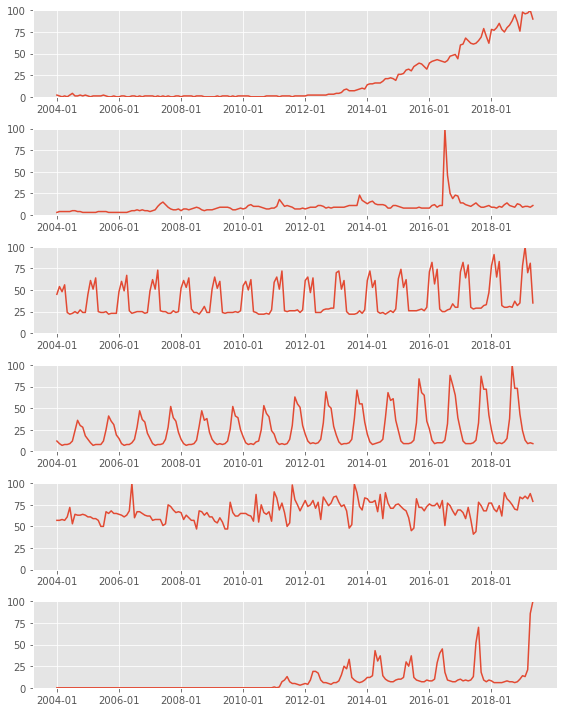

In [8]:
import matplotlib; matplotlib.style.use('ggplot')

fig, axs = plt.subplots(len(trend_dfs), 1, figsize=(8, 10))
plt.tight_layout()
for i, trend_df in enumerate(trend_dfs):
    ax = axs[i]
    #ax.set_title(str(trends[i]))
    ax.plot(trend_df.index, trend_df['values'])
    ticks = ax.get_xticks()
    ax.set_ylim((0, 100))
    ax.set_xticks([tick for tick in ticks if tick%24 == 0])

In [9]:
trends

[{'trend_name': 'data-science', 'country_code': 'us'},
 {'trend_name': 'pokemon', 'country_code': 'us'},
 {'trend_name': 'taxes', 'country_code': 'us'},
 {'trend_name': 'football', 'country_code': 'us'},
 {'trend_name': 'football', 'country_code': 'uk'},
 {'trend_name': 'game-of-thrones', 'country_code': 'us'}]

## UK Football - Time Series

In [43]:
footballuk_df = load_trend('football','uk')
footballuk_df['i'] = np.arange(len(got_df))
footballuk_df['month'] = got_df['i'] % 12

In [44]:
footballuk_df['month'] += 1

In [46]:
# footballuk_df

In [ ]:
trend_model = LinearRegression()


## Game of Thrones - Time Series

In [33]:
got_df = load_trend('game-of-thrones')
got_df['i'] = np.arange(len(got_df))
got_df['month'] = got_df['i'] % 12

In [47]:
got_df['month'] +=1
# got_df

In [36]:
trend_model = LinearRegression()
trend_model.fit(got_df[['i']], got_df['values'])
trend_line = trend_model.predict(got_df[['i']])

In [38]:
month_encoder = OneHotEncoder(categories='auto')
month_encoder.fit(got_df[['month']])
month_data = month_encoder.transform(got_df[['month']]).toarray()

In [39]:
lr = LinearRegression()
data = np.hstack((got_df[['i']].values, month_data))
lr.fit(data, got_df['values'])
lr_pred = lr.predict(data)  # Predixctive model based on i and month

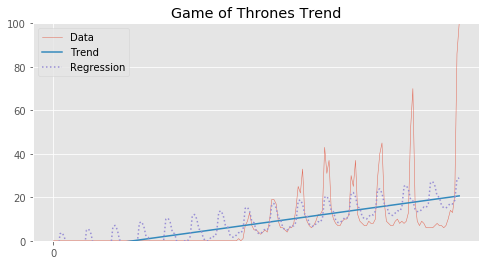

In [40]:
trend_df = got_df
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_title('Game of Thrones Trend')
ax.plot(got_df['i'], trend_df['values'], label='Data',
       linewidth=.5, alpha=.8)
ax.plot(trend_df['i'], trend_line, label='Trend')
ax.plot(trend_df['i'], lr_pred, label='Regression', linestyle="dotted")
plt.legend()
ticks = ax.get_xticks()
ax.set_ylim((0, 100))
ax.set_xticks([tick for tick in ticks if tick%24 == 0])
plt.show()

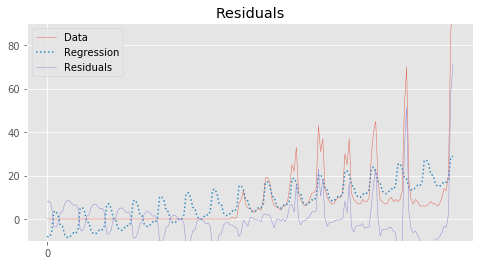

In [41]:
residuals = trend_df['values'] - lr_pred

fig, ax = plt.subplots(figsize=(8, 4))
ax.set_title("Residuals")
ax.plot(trend_df['i'], trend_df['values'], label='Data',
       linewidth=.5, alpha=.8)
ax.plot(trend_df['i'], lr_pred, label='Regression', linestyle="dotted")
ax.plot(trend_df['i'], residuals,
        label='Residuals', linewidth=.5)

#ax.plot(trend_df.index, trend_line, label='trend')
plt.legend()
ticks = ax.get_xticks()
ax.set_ylim((-10, 90))
ax.set_xticks([tick for tick in ticks if tick%24 == 0])
plt.show()

## Data Science Trend - Time Series

In [20]:
datasci_df = load_trend('data-science')
datasci_df['i'] = np.arange(len(datasci_df))
datasci_df['month'] = datasci_df['i'] % 12

In [22]:
datasci_df['month'] += 1

In [57]:
datasci_df = datasci_df.loc[datasci_df['i']>107]
datasci_df

,values,i,month
2013-01,4,108,1
2013-02,4,109,2
2013-03,5,110,3
2013-04,8,111,4
2013-05,9,112,5
2013-06,7,113,6
2013-07,7,114,7
2013-08,7,115,8
2013-09,8,116,9
2013-10,9,117,10


In [58]:
trend_model = LinearRegression()
trend_model.fit(datasci_df[['i']], datasci_df['values'])
trend_line = trend_model.predict(datasci_df[['i']])

In [59]:
month_encoder = OneHotEncoder(categories='auto')
month_encoder.fit(datasci_df[['month']])
month_data = month_encoder.transform(datasci_df[['month']]).toarray()

In [60]:
lr = LinearRegression()
data = np.hstack((datasci_df[['i']].values, month_data))
lr.fit(data, datasci_df['values'])
lr_pred = lr.predict(data)  # Predixctive model based on i and month

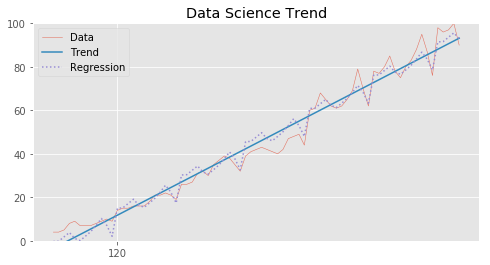

In [61]:
trend_df = datasci_df
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_title('Data Science Trend')
ax.plot(datasci_df['i'], trend_df['values'], label='Data',
       linewidth=.5, alpha=.8)
ax.plot(trend_df['i'], trend_line, label='Trend')
ax.plot(trend_df['i'], lr_pred, label='Regression', linestyle="dotted")
plt.legend()
ticks = ax.get_xticks()
ax.set_ylim((0, 100))
ax.set_xticks([tick for tick in ticks if tick%24 == 0])
plt.show()

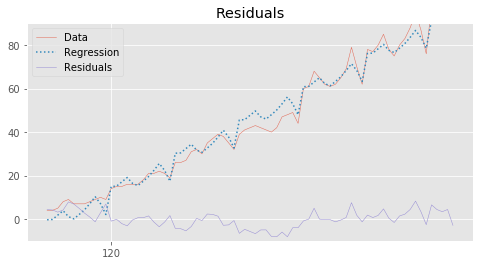

In [62]:
residuals = trend_df['values'] - lr_pred

fig, ax = plt.subplots(figsize=(8, 4))
ax.set_title("Residuals")
ax.plot(trend_df['i'], trend_df['values'], label='Data',
       linewidth=.5, alpha=.8)
ax.plot(trend_df['i'], lr_pred, label='Regression', linestyle="dotted")
ax.plot(trend_df['i'], residuals,
        label='Residuals', linewidth=.5)

#ax.plot(trend_df.index, trend_line, label='trend')
plt.legend()
ticks = ax.get_xticks()
ax.set_ylim((-10, 90))
ax.set_xticks([tick for tick in ticks if tick%24 == 0])
plt.show()

## Taxes in US Trend - Time Series

In [10]:
taxes_df = load_trend('taxes')
taxes_df['i'] = np.arange(len(taxes_df))
taxes_df['month'] = taxes_df['i'] % 12

In [11]:
taxes_df['month'] += 1
#fix how the month numbers in the month column from 0 represents jan to 1 represents jan

In [18]:
# taxes_df

In [13]:
trend_model = LinearRegression()
trend_model.fit(taxes_df[['i']], taxes_df['values'])
trend_line = trend_model.predict(taxes_df[['i']])

In [14]:
month_encoder = OneHotEncoder(categories='auto')
month_encoder.fit(taxes_df[['month']])
month_data = month_encoder.transform(taxes_df[['month']]).toarray()

In [15]:
lr = LinearRegression()
data = np.hstack((taxes_df[['i']].values, month_data))
lr.fit(data, taxes_df['values'])
lr_pred = lr.predict(data)  # Predixctive model based on i and month

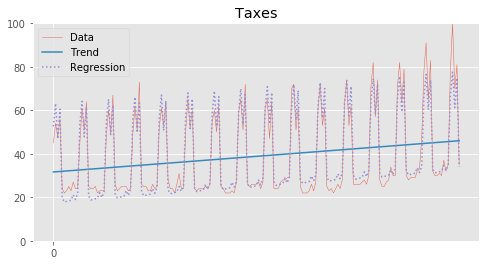

In [16]:
trend_df = taxes_df
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_title('Taxes')
ax.plot(trend_df['i'], trend_df['values'], label='Data',
       linewidth=.5, alpha=.8)
ax.plot(trend_df['i'], trend_line, label='Trend')
ax.plot(trend_df['i'], lr_pred, label='Regression', linestyle="dotted")
plt.legend()
ticks = ax.get_xticks()
ax.set_ylim((0, 100))
ax.set_xticks([tick for tick in ticks if tick%24 == 0])
plt.show()

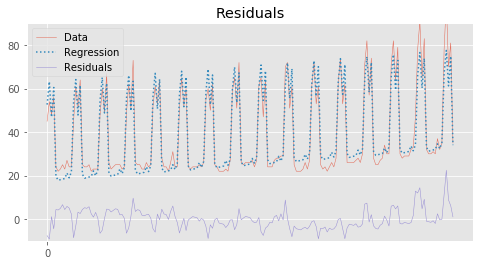

In [17]:
residuals = trend_df['values'] - lr_pred

fig, ax = plt.subplots(figsize=(8, 4))
ax.set_title("Residuals")
ax.plot(trend_df['i'], trend_df['values'], label='Data',
       linewidth=.5, alpha=.8)
ax.plot(trend_df['i'], lr_pred, label='Regression', linestyle="dotted")
ax.plot(trend_df['i'], residuals,
        label='Residuals', linewidth=.5)

#ax.plot(trend_df.index, trend_line, label='trend')
plt.legend()
ticks = ax.get_xticks()
ax.set_ylim((-10, 90))
ax.set_xticks([tick for tick in ticks if tick%24 == 0])
plt.show()

## Conclusion

traditional time series forcasting comes before data science ever exists, it's important to be aware that if we're trying to predict the sales for the new product, try to look at different features/variables that might impact the market and sales for the particular new product segement, then do a prediction for the possible sales result for the new product. 

For example, for keybox, we should look at the trends in smart lock and traditional lock box to find the relevant variables to predict with time series.

## Create Functions

In [65]:
def fit_trend_model(trend_df):
    trend_df['i'] = np.arange(len(trend_df))
    trend_df['month'] = trend_df['i'] % 12
    trend_model = LinearRegression()
    trend_model.fit(trend_df[['i']], trend_df['values'])
    trend_line = trend_model.predict(trend_df[['i']])
    month_encoder = OneHotEncoder(categories='auto')
    month_encoder.fit(trend_df[['month']])
    month_data = month_encoder.transform(trend_df[['month']]).toarray()
    lr = LinearRegression()
    data = np.hstack((trend_df[['i']].values, month_data))
    lr.fit(data, trend_df['values'])
    return lr

def get_prediction_for_trend(topic, country):
    trend_df = load_trend(topic, country)
    lr = fit_trend_model(trend_df)
    lr_pred = lr.predict(data) # Predixctive model based on i and month
    return lr_pred
lr_pred = get_prediction_for_trend('football', 'uk')